In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import datasets


In [2]:
###moduleDir = 'MACHINE LEARNING'
outDir = os.path.join('output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.2
EPOCHS = 200
N_SAMPLES = 1000
ALPHA = 0.1

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

<Figure size 1500x600 with 0 Axes>

In [3]:
X, y = datasets.make_moons(n_samples = N_SAMPLES,
                           shuffle = True, 
                           noise = NOISE,
                            random_state=RANDOM_STATE)
X[:5],y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [4]:
data_df = pd.DataFrame(X, columns=['A','B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
data_df.isnull().sum()

A         0
B         0
target    0
dtype: int64

## Different way of plotting

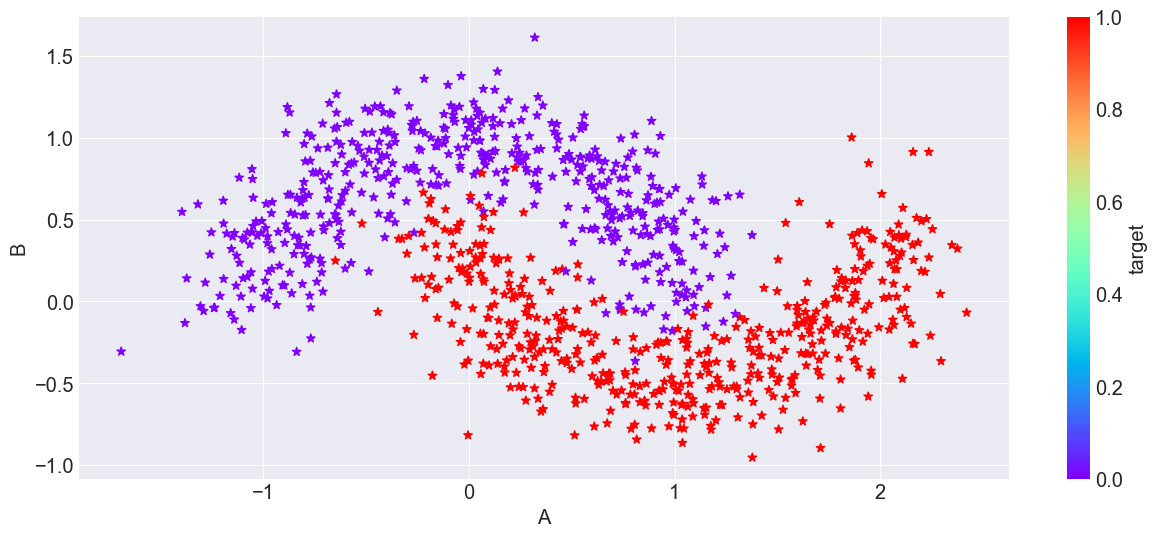

In [8]:
data_df.plot.scatter('A','B',
                    s = 40,
                    marker = '*',
                    c = 'target',
                    cmap = CMAP);

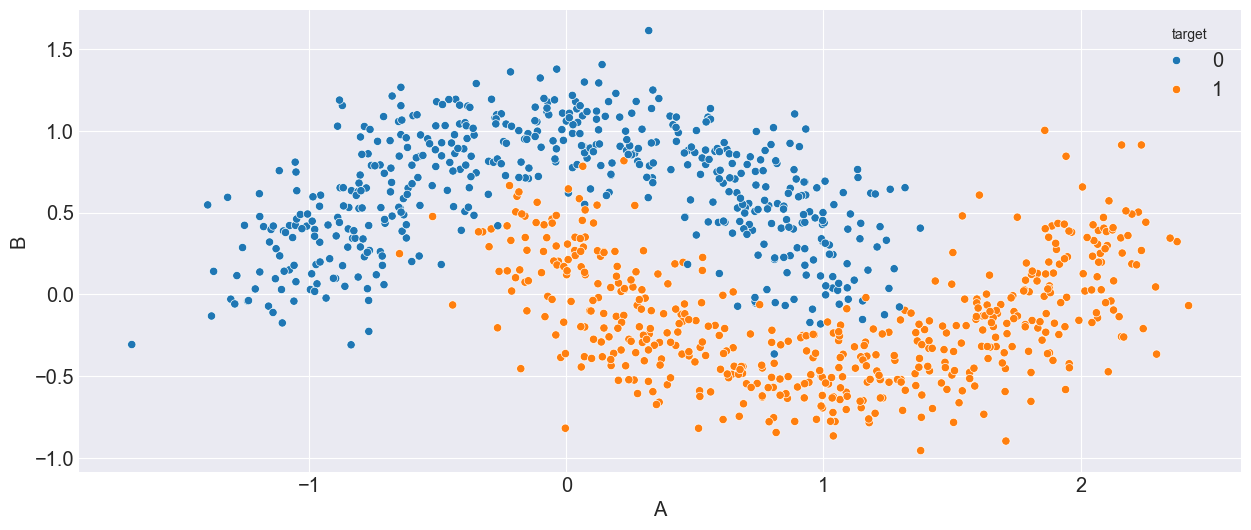

In [9]:
ax = sns.scatterplot(x = 'A',y='B',data = data_df,hue = 'target');

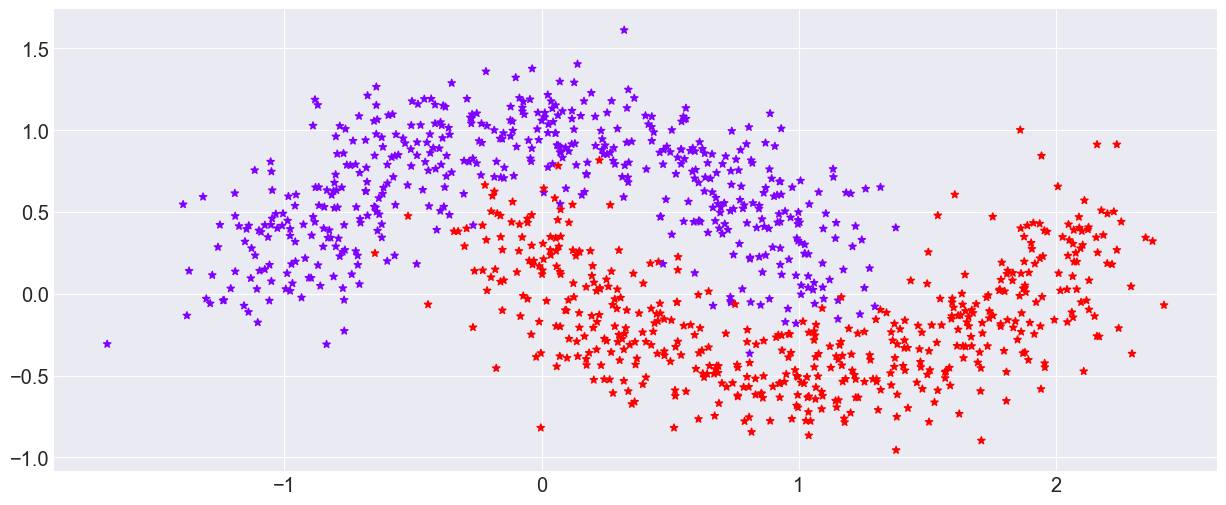

In [10]:
plt.scatter(X[:,0],X[:,1],s = 30,c= y,marker = '*',cmap=CMAP);

In [11]:
data_train, data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900:]

print(data_train.shape, data_test.shape)

print(type(data_train),type(data_test))

(900, 3) (100, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Prediction

In [12]:
def predict(row: np.ndarray, weights: np.ndarray)-> np.float64:
    # building up z = X*W+b   i.e y = mx+c
    z = weights[0]  # initialize with b, bias means it is intercept x and it started from 0

    for i in range(len(row)-1):

        z += weights[i+1] * row[i] # weights are added here to the values

    return 1 if z >= 0 else 0 # simplest form of activation function

### Its advisable to test the function

In [13]:
# unit test
weights = np.array([0.1,2.0,1.0])

display(data_df.loc[0])

predict(data_df.loc[0].values, weights)

A         0.906340
B         0.902676
target    0.000000
Name: 0, dtype: float64

1

In [14]:
def train_weights( train:np.ndarray,alpha :np.float64, n_epoch:np.int64):
    # we will appending error in a list
    errors= []
    
    weights = rng.random(train.shape[1])

    m = train.shape[0]

    for epoch in range(n_epoch):

        sum_error = 0.0

        for row in train:
            prediction = predict(row, weights) # make prediction by row
            
            dz = prediction - row[-1] # dz = (a-y)
            sum_error += (prediction - row[-1])**2 # cumulative error for this epoch

            weights[0] = weights[0] - alpha * dz / m # update b 
            for i in range(len(row)-1):
                weights[i +1] = weights[i+1] - alpha * dz * row[i] / m 
        errors.append(sum_error / m) # append average error
    return errors, weights
            

In [15]:
# calling 'train_weight'

errors, weights = train_weights(data_train, ALPHA, EPOCHS)

print(weights)

[-6.44966640e-05  2.40695264e-04 -3.57032974e-04]


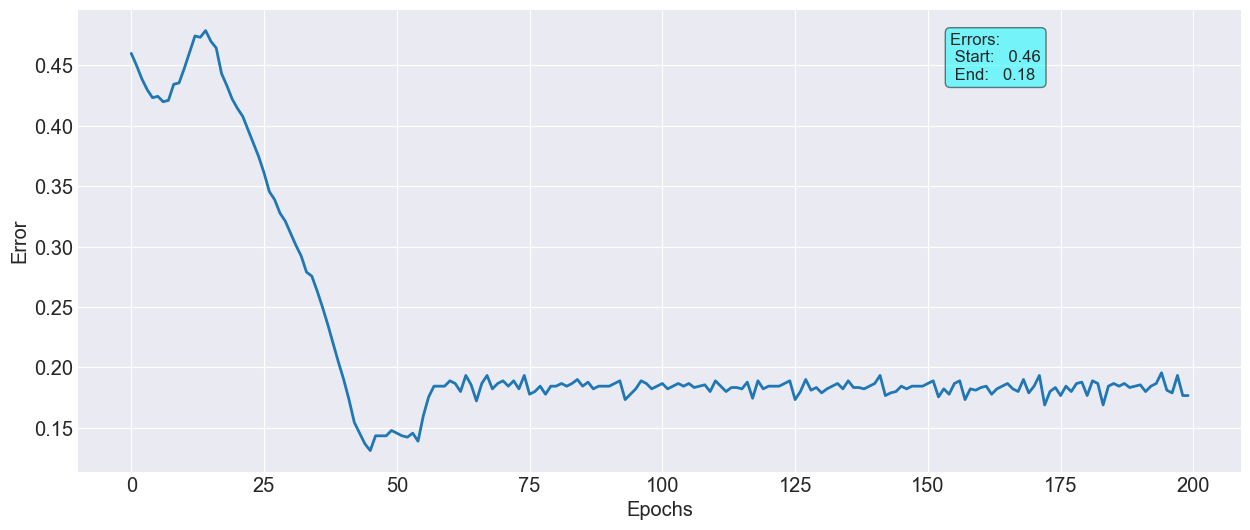

In [16]:
fig, ax = plt.subplots()
ax.plot(errors);

txtstr = "Errors: \n Start:{:7.2f}\n End:{:7.2f}".format(errors[0], errors[-1])

props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

ax.text(0.75,0.95, txtstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error");

# Train set

In [17]:
predictions = []

for row in data_train:

    prediction = predict(row, weights)

    predictions.append(prediction)

In [18]:
accuracy_score(data_train[:,-1], predictions)

0.8311111111111111

# Test set

In [19]:
predictions = []

for row in data_test:

    prediction = predict(row, weights)

    predictions.append(prediction)

In [20]:
accuracy_score(data_test[:,-1], predictions)

0.89

In [21]:
cm = confusion_matrix(data_test[:,-1], predictions)
cm

array([[54,  4],
       [ 7, 35]], dtype=int64)

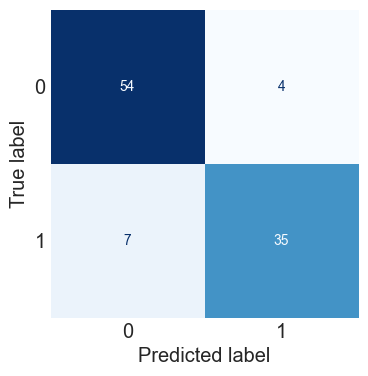

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax=ax, cmap = 'Blues', colorbar=False)
plt.grid()
plt.show();